# **Classification Example for Naive Bayes and Logistic Regression**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Read dataset
df_net = pd.read_csv('/content/Social_Network_Ads.csv')
df_net.head()

# Get required data
df_net.drop(columns = ['User ID'], inplace=True)
df_net.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
# Describe data
df_net.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<ipython-input-4-34f7a421ef24>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_net['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

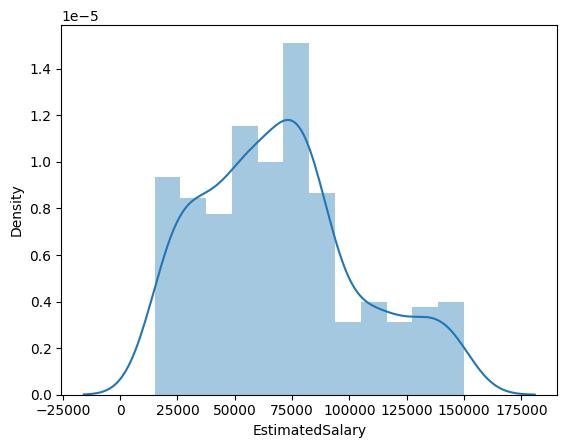

In [ ]:
# Salary distribution
sns.distplot(df_net['EstimatedSalary'])

In [ ]:
# Label encoding
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

# Correlation matrix
df_net.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

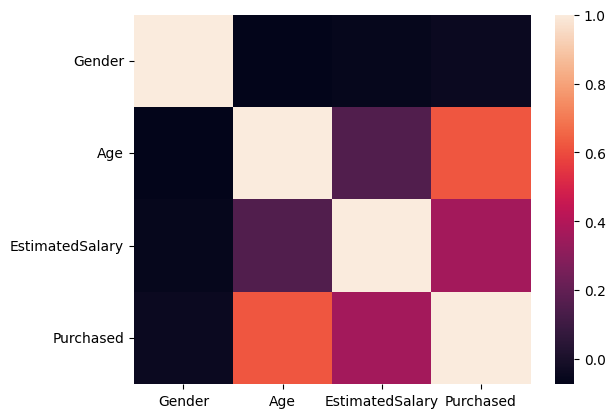

In [ ]:
sns.heatmap(df_net.corr())

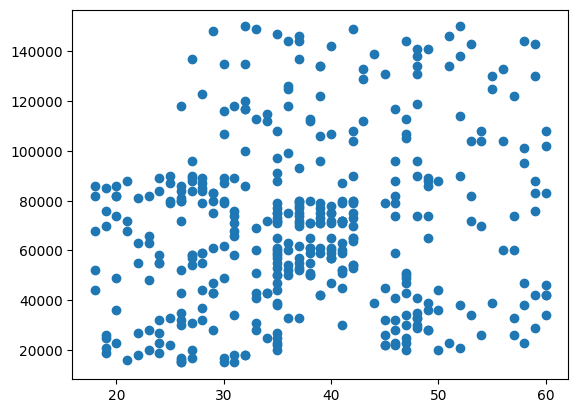

In [ ]:
# Drop Gender column
df_net.drop(columns=['Gender'], inplace=True)

# Relationship between Age and Salary
plt.scatter(df_net['Age'], df_net['EstimatedSalary'])

In [ ]:
# Split data into independent/dependent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

# Split data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Bayes Theorem

In [ ]:
# Train Bayes-Theorem model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


# Logistic Regression

In [ ]:
# Classifier
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


# Measuring Success of the Models with Precision, Recall & F1 Measure

In [ ]:
# Accuracy
print(accuracy_score(y_test, y_pred))

# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

0.83
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        58
           1       0.84      0.74      0.78        42

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.7848101265822786


<Axes: >

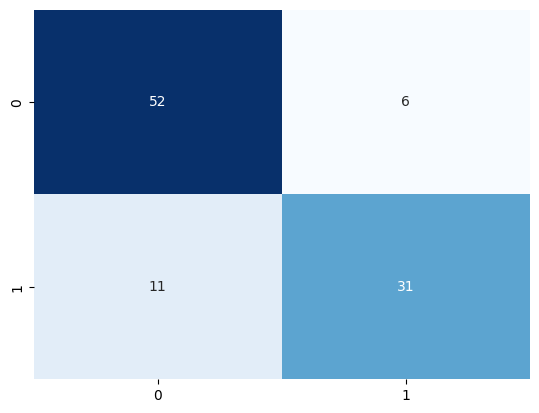

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

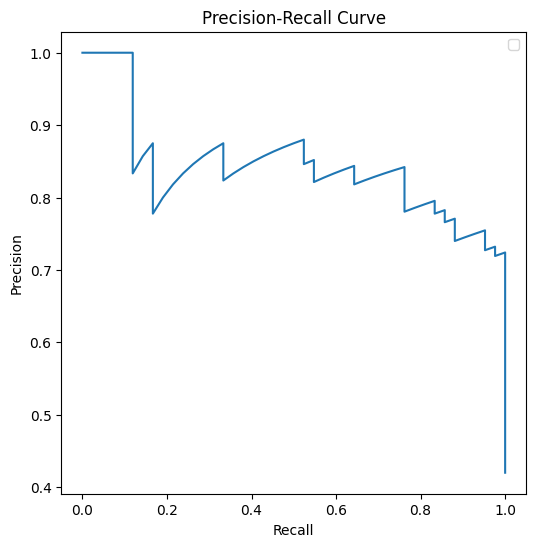

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend()

<ipython-input-15-a6bab2667fbf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


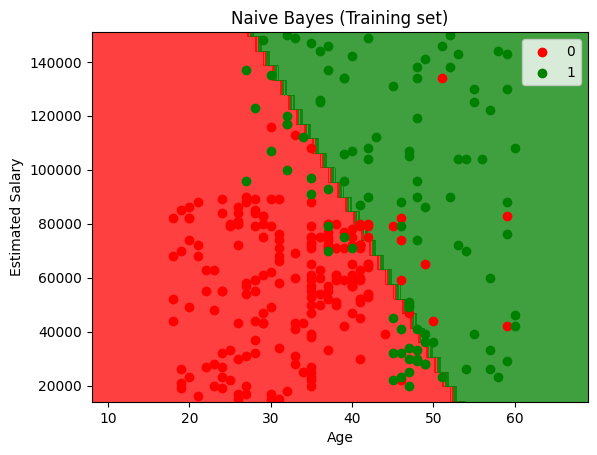

In [ ]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-16-a721b2449967>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


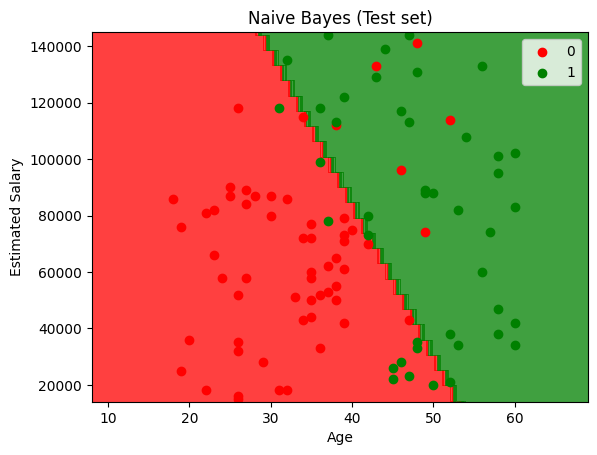

In [ ]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


# **Sentiment Analysis (Movie Review)**

In [ ]:
import pandas as pd

# read data
dataset = pd.read_csv('./train.tsv', delimiter='\t')

In [ ]:
# display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
dataset.Sentiment.value_counts()

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

In [ ]:
# prepare the bag of words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Phrase'])

In [ ]:
# divide the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dataset['Sentiment'], test_size=0.25, random_state=5)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# fitting the data using Multinomial Naive Bayes
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics

# evaluate the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

60.25%


# **Implementing Logistic Regression From Scratch**

In [ ]:
#importing all the libraries required
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
cancer=sklearn.datasets.load_breast_cancer()
#converting the data to a pandas dataframe object
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data["label"] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X=data.iloc[:,:-1] #all rows, all columns except the last
y=data.iloc[:,-1] # all rows, only the last column
X=MinMaxScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [ ]:
# sigmoid function

def sigmoid(x):
 return 1/(1+np.exp(-x))

In [ ]:
# logistic regression function

def logistic_regression(features,target,epoch,lr):

    weights=np.zeros(features.shape[1])
    # features.shape[1] = number of columns

    for i in range(epoch):
        scores=np.dot(features,weights)
        predictions=sigmoid(scores)

        gradient=np.dot(features.T,(predictions-target))
        weights-=lr*gradient

    return weights

In [ ]:
# calculate the gradient and update wights
weights = logistic_regression(X_train, Y_train, epoch = 10000, lr = 0.1)

In [ ]:
# compute the predictions for test data

test_scores=np.dot(X_test,weights)
preds=np.round(sigmoid(test_scores)) #convert score to 0 or 1
from sklearn.metrics import accuracy_score
print("Accuracy: "+str(accuracy_score(preds, Y_test)))

Accuracy: 0.9415204678362573


# **Simple Cross Entropy Loss**

In [ ]:
# Importing the required library
import torch.nn as nn
import torch

# Defining the object for this class.
loss = nn.CrossEntropyLoss()

# y_pred: Predicted values
y_pred = torch.tensor([[1.4, 0.4, 1.1, 0.1, 2.3]])

# y_true: True class label
y_true = torch.tensor([0])

# Passing these values to the loss object.
cross_entropy_loss = loss(y_pred, y_true)

# Printing the value of the loss.
print("Cross Entropy Loss: ", cross_entropy_loss.item())

Cross Entropy Loss:  1.5770866870880127


# **TF-IDF Example from Scratch**

In [ ]:
import pandas as pd
import numpy as np

corpus = ['data science is one of the most important fields of science',
          'this is one of the best data science courses',
          'data scientists analyze data' ]

# create a word set for the corpus
words_set = set()

for doc in  corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

Number of words in the corpus: 14
The words in the corpus: 
 {'courses', 'of', 'fields', 'science', 'this', 'is', 'best', 'data', 'important', 'most', 'the', 'scientists', 'one', 'analyze'}


In [ ]:
n_docs = len(corpus)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns = list(words_set))

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))

df_tf

,courses,of,fields,science,this,is,best,data,important,most,the,scientists,one,analyze
0,0.000000,0.181818,0.090909,0.181818,0.000000,0.090909,0.000000,0.090909,0.090909,0.090909,0.090909,0.00,0.090909,0.00
1,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.111111,0.00,0.111111,0.00
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.25,0.000000,0.25


In [ ]:
# compute Inverse Document Frequency

print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word

    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1

    idf[w] =  np.log10(n_docs / k)

    print(f'{w:>15}: {idf[w]:>10}' )

IDF of: 
        courses: 0.47712125471966244
           most: 0.47712125471966244
           best: 0.47712125471966244
     scientists: 0.47712125471966244
            the: 0.17609125905568124
         fields: 0.47712125471966244
           data:        0.0
             of: 0.17609125905568124
             is: 0.17609125905568124
            one: 0.17609125905568124
        analyze: 0.47712125471966244
      important: 0.47712125471966244
           this: 0.47712125471966244
        science: 0.17609125905568124


In [ ]:
# compute TF-IDF
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

df_tf_idf

,courses,most,best,scientists,the,fields,data,of,is,one,analyze,important,this,science
0,0.000000,0.043375,0.000000,0.00000,0.016008,0.043375,0.0,0.032017,0.016008,0.016008,0.00000,0.043375,0.000000,0.032017
1,0.053013,0.000000,0.053013,0.00000,0.019566,0.000000,0.0,0.019566,0.019566,0.019566,0.00000,0.000000,0.053013,0.019566
2,0.000000,0.000000,0.000000,0.11928,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.11928,0.000000,0.000000,0.000000


# **TF-IDF Example with Scikit-learn**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (3, 14)


In [ ]:
# convert to a regular array

tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0.         0.         0.         0.18952581 0.32089509 0.32089509
  0.24404899 0.32089509 0.48809797 0.24404899 0.48809797 0.
  0.24404899 0.        ]
 [0.         0.40029393 0.40029393 0.23642005 0.         0.
  0.30443385 0.         0.30443385 0.30443385 0.30443385 0.
  0.30443385 0.40029393]
 [0.54270061 0.         0.         0.64105545 0.         0.
  0.         0.         0.         0.         0.         0.54270061
  0.         0.        ]]


In [ ]:
# obtain the original terms in the corpus

words_set = tr_idf_model.get_feature_names_out()

print(words_set)

['analyze' 'best' 'courses' 'data' 'fields' 'important' 'is' 'most' 'of'
 'one' 'science' 'scientists' 'the' 'this']


In [ ]:
# show the TF-IDF scores

df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)

df_tf_idf

,analyze,best,courses,data,fields,important,is,most,of,one,science,scientists,the,this
0,0.000000,0.000000,0.000000,0.189526,0.320895,0.320895,0.244049,0.320895,0.488098,0.244049,0.488098,0.000000,0.244049,0.000000
1,0.000000,0.400294,0.400294,0.236420,0.000000,0.000000,0.304434,0.000000,0.304434,0.304434,0.304434,0.000000,0.304434,0.400294
2,0.542701,0.000000,0.000000,0.641055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542701,0.000000,0.000000


In [ ]:
!pip install nltk
!pip install gensim

# **Word Embedding using Word2Vec**

In [ ]:
# importing all necessary modules
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import nltk
nltk.download('punkt')

warnings.filterwarnings(action='ignore')


#  Reads ‘alice.txt’ file
sample = open("/content/alice.txt")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)

# Print results
print("Cosine similarity between 'alice' " +
      "and 'wonderland' - CBOW : ",
      model1.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
      "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)

# Print results
print("Cosine similarity between 'alice' " +
      "and 'wonderland' - Skip Gram : ",
      model2.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
      "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9806046
Cosine similarity between 'alice' and 'machines' - CBOW :  0.93546546
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.77222234
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.86617553
